<a href="https://colab.research.google.com/github/Maxxx-VS/The-Founder/blob/master/%D0%9E%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5_%D1%81%D0%B2%D0%BE%D0%B5%D0%B9_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D0%B8_%D1%82%D0%B5%D1%81%D1%82.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
# Подключение к моему Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
# Импортирую необходимые библиотеки
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import torch
import torchvision
import random

In [20]:
# Создание пользовательского класса набора данных
class ImageDataset(torch.utils.data.Dataset):
	def __init__(self, dir, transform=None):
		self.data_dir = dir
		self.images = os.listdir(dir)
		self.transform = transform

	# Определение длины набора данных
	def __len__(self):
		return len(self.images)

	# Определение метода получения элемента из набора данных
	def __getitem__(self, index):
		image_path = os.path.join(self.data_dir, self.images[index])
		image = np.array(Image.open(image_path))

		# Применение преобразования
		if self.transform:
			image = self.transform(image)

		return image


Всего данных: 30


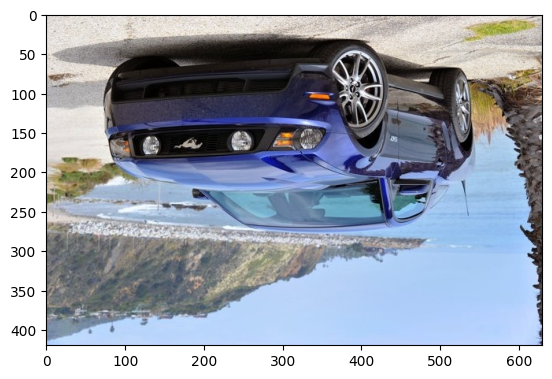

In [29]:
# Путь к набору данных
data_path = '/content/drive/MyDrive/c_vs_p/train/cars'

# Создание переменной датасета
dataset = ImageDataset(data_path)

# Получение длины набора данных
dataset_length = len(dataset)

# Вывод длины набора данных
print('Всего данных:',dataset_length)

# Генерация случайного индекса в наборе данных
random_index = random.randint(0, dataset_length - 1)

# Вывод случайно выбранного изображения
plt.imshow(dataset[random_index])
plt.show()

In [30]:
# Определение пользовательского класса
class CustomTransform(object):
    def __init__(self, split_percent=0.5):
        self.split_percent = split_percent

    # Определение метода преобразования
    def __call__(self, image):
        # Разделение изображения на две части
        split = int(image.shape[1] * self.split_percent)
        image1 = image[:, :split, :]
        image2 = image[:, split:, :]

        # Возврат 2 частей изображений
        return image1, image2

In [31]:
# Определение состава преобразований
transform = torchvision.transforms.Compose([
    # Замена на преобразованный объект
    CustomTransform(),
])

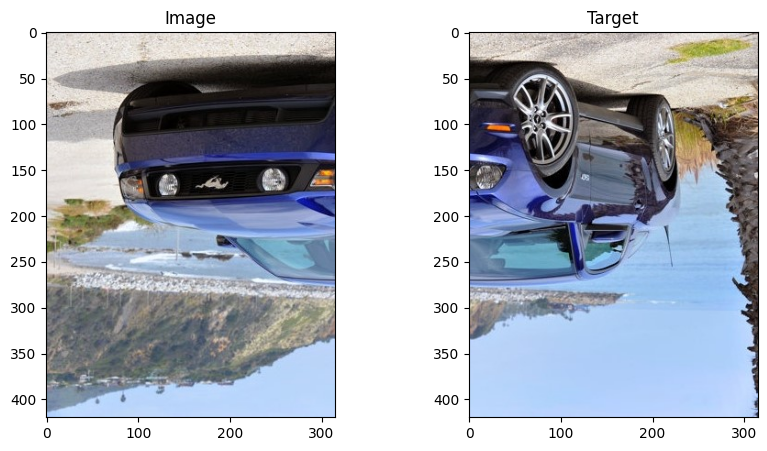

In [32]:
# Создание объекта набора данных с помощью преобразований
dataset = ImageDataset(data_path, transform=transform)

# Первое разделенное изображение из набора данных
image, target = dataset[random_index]

# Вывод изображения
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Image')
plt.subplot(1, 2, 2)
plt.imshow(target)
plt.title('Target')
plt.show()

In [33]:
# Определение пользовательского класса расширения
class CustomAugmentation(object):
	def __init__(self, flip_prob=0.5, jitter_prob=0.5):
		self.flip_prob = flip_prob
		self.jitter_prob = jitter_prob

	# Определение метода преобразования
	def __call__(self, image):
		# Flipping the image horizontally
		if np.random.random() < self.flip_prob:
			image = np.flip(image, axis=1)

		# Добавление случайного шума
		if np.random.random() < self.jitter_prob:
			image = np.array(image, dtype=np.int32)
			# Добавление случайного шума к изображению
			image = image + np.random.randint(-50, 50, size=image.shape, dtype=np.int32)

		# Возврат увеличенного изображения
		return image


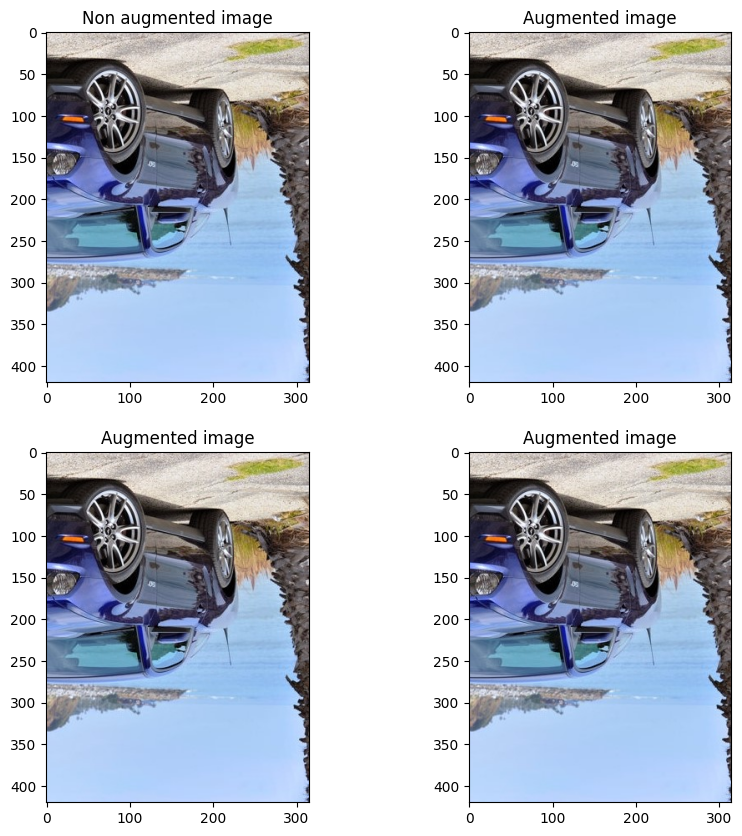

In [40]:
# Определение дополненных преобразований
aug_transform = torchvision.transforms.Compose([
	# Замена на объект преобразования
	CustomTransform(),
	CustomAugmentation(),
])
nonaug_transform = torchvision.transforms.Compose([
	# Замена на объект преобразования
	CustomTransform(),
])

# Создание датасета с дополненными преобразованиями
aug_dataset = ImageDataset(data_path, transform=aug_transform)
nonaug_dataset = ImageDataset(data_path, transform=nonaug_transform)

#  Отображение изображений из набора данных и его дополненной версии
image, target = nonaug_dataset[random_index]


plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.imshow(target)
plt.title('Non augmented image')

for i in range(2, 5):
	image, target1 = aug_dataset[random_index]
	plt.subplot(2, 2, i)
	plt.imshow(target1)
	plt.title('Augmented image')

plt.show()


In [36]:
# Определение пользовательского загрузчика данных
dataloader = torch.utils.data.DataLoader(
	# Замена на объект набора данных
	dataset=dataset,

	#  Определение размера пакета
	batch_size=4,

	# Если значение равно true, набор данных перетасовывается в каждую эпоху
	shuffle=True,

	# Количество параллельных процессов для загрузки данных
	num_workers=2
)


# Количество партий
print('Количество партий:',len(dataloader))


Number of batches: 8


In [41]:
# Путь к файлу набора данных
train_path = '/content/drive/MyDrive/c_vs_p/train/cars'
test_path = '/content/drive/MyDrive/c_vs_p/val/cars'


# Определение обучающего и тестового преобразования
train_transform = torchvision.transforms.Compose([
	CustomTransform(),
	CustomAugmentation(),
])
test_transform = torchvision.transforms.Compose([
	CustomTransform(),
])


# Создание обучающих и тестовых наборов данных
train_dataset = ImageDataset(train_path, transform=train_transform)
test_dataset = ImageDataset(test_path, transform=test_transform)


# Создание обучающих и тестовых загрузчиков данных
train_dataloader = torch.utils.data.DataLoader(
	dataset=train_dataset,
	batch_size=4,
	shuffle=True,
	num_workers=2
)
test_dataloader = torch.utils.data.DataLoader(
	dataset=test_dataset,
	batch_size=1,
	shuffle=False,
	num_workers=2
)

# Вывод длины тестовых загрузчиков данных
print('Number of training batches:',len(train_dataloader))
print('Number of testing batches:',len(test_dataloader))


Number of training batches: 8
Number of testing batches: 5
